In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

# NetworkXによるグラフの分析と可視化

* おのうえ (@_likr)
* PyData Osaka Meetup #1
* 2016/10/30

# 自己紹介

* 尾上洋介 (Yosuke Onoue)
* 京都大学 学際融合教育研究推進センター 政策のための科学ユニット 特定助教
* 研究内容
    * 数理最適化
    * 情報可視化
        * **グラフドローイング**
* コミュニティ活動
    * ng-kyoto
    * 関西フロントエンドUG
    * GDG Kobe
    * Kobe.py

## 今回の内容


* [オープンソースで学ぶ社会ネットワーク分析――ソーシャルWebの「つながり」を見つけ出す](http://www.oreilly.co.jp/books/9784873115504/) の3〜4章をかいつまんで紹介
    * Python3向けにちょっとソースコードをアレンジしたり

# グラフ？

* × 棒グラフ、円グラフ、折れ線グラフ
* ○ グラフ理論
  * 何かと何かのつながり(ネットワーク)を扱う数学概念
  
## ネットワーク分析

* 複雑ネットワーク
    * スモールワールド
* 手法
    * 中心性 (Centrality)
    * コミュニティ (Community)
    * …

# NetworkX

* https://networkx.github.io/
* Python用ネットワーク分析ライブラリ
* 機能
    * グラフの操作
    * アルゴリズム
    * グラフ生成
    * 描画
    * グラフファイルの読み書き

# グラフの作成

## 無向グラフ

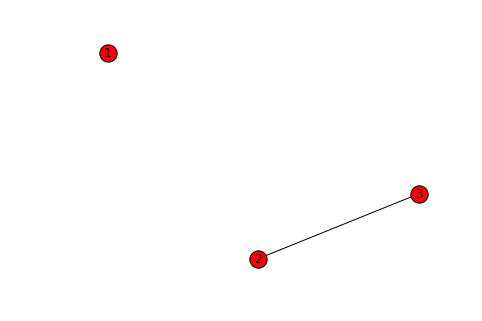

In [2]:
import networkx as nx

graph = nx.Graph()
graph.add_node(1)
graph.add_edge(2, 3)

nx.draw(graph, with_labels=True)

## 有向グラフ

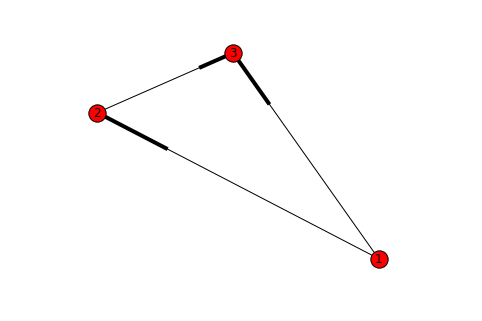

In [3]:
digraph = nx.DiGraph()
digraph.add_edge(1, 2)
digraph.add_edge(1, 3)
digraph.add_edge(2, 3)

nx.draw(digraph, with_labels=True)

## グラフ生成

http://networkx.readthedocs.io/en/latest/reference/generators.html

In [4]:
g = nx.krackhardt_kite_graph()

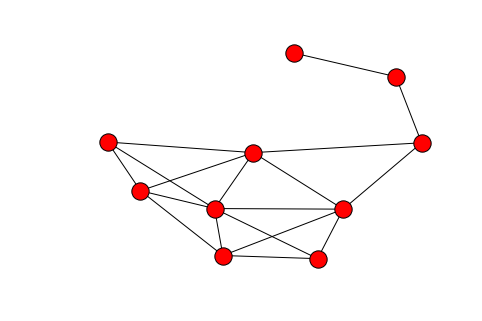

In [5]:
nx.draw(g)

# グラフの操作

https://networkx.readthedocs.io/en/stable/reference/classes.html

In [6]:
g.number_of_edges()

18

In [7]:
g.number_of_nodes()

10

In [8]:
len(g)

10

In [9]:
g.adjacency_list()

[[1, 2, 3, 5],
 [0, 3, 4, 6],
 [0, 3, 5],
 [0, 1, 2, 4, 5, 6],
 [1, 3, 6],
 [0, 2, 3, 6, 7],
 [1, 3, 4, 5, 7],
 [8, 5, 6],
 [9, 7],
 [8]]

In [10]:
g.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 4),
 (1, 6),
 (2, 3),
 (2, 5),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 6),
 (5, 6),
 (5, 7),
 (6, 7),
 (7, 8),
 (8, 9)]

In [11]:
for x in g:
    print(x, g[x])

0 {1: {}, 2: {}, 3: {}, 5: {}}
1 {0: {}, 3: {}, 4: {}, 6: {}}
2 {0: {}, 3: {}, 5: {}}
3 {0: {}, 1: {}, 2: {}, 4: {}, 5: {}, 6: {}}
4 {1: {}, 3: {}, 6: {}}
5 {0: {}, 2: {}, 3: {}, 6: {}, 7: {}}
6 {1: {}, 3: {}, 4: {}, 5: {}, 7: {}}
7 {8: {}, 5: {}, 6: {}}
8 {9: {}, 7: {}}
9 {8: {}}


# グラフの描画

http://networkx.readthedocs.io/en/latest/reference/drawing.html

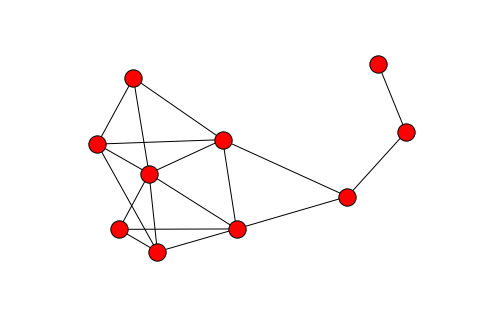

In [12]:
nx.draw(g)

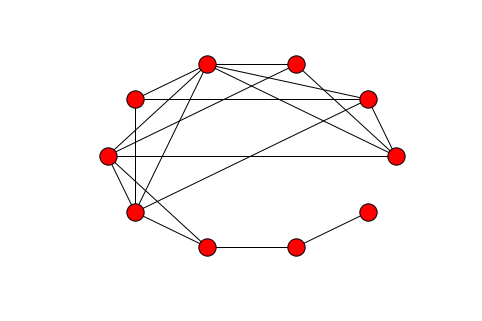

In [13]:
nx.draw_circular(g)

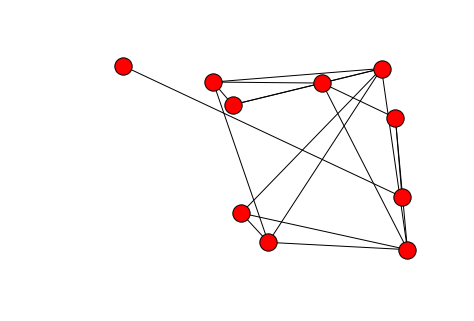

In [14]:
nx.draw_random(g)

# ファイルの読み書き

* http://networkx.readthedocs.io/en/latest/reference/readwrite.html
* 対応フォーマット
    * GML
    * GraphML
    * JSON
    * Pajek
    * …

# データの収集

* SNSの友達関係
* Webのリンク関係
* …

## スノーボールサンプリング

* 誰か一人(自分など)を起点として、指定したホップ数の友達関係を収集

### [LiveJournal](http://www.livejournal.com/) の例

In [15]:
from urllib.request import urlopen

def read_lj_friends(g, name):
    response = urlopen('http://www.livejournal.com/misc/fdata.bml?user=' + name)
    for line in response.readlines():
        if line.startswith(b'#'):
            continue
        parts=line.split()
        if len(parts) == 0:
            continue
        if parts[0] == '<':
            g.add_edge(parts[1],name)
        else:
            g.add_edge(name,parts[1])

def snowball_sampling(g, center, max_depth=1, current_depth=0, taboo_list=[]):
    if current_depth == max_depth:
        return taboo_list
    if center in taboo_list:
        return taboo_list
    else:
        taboo_list.append(center)
    read_lj_friends(g, center)
    for node in g.neighbors(center):
        taboo_list = snowball_sampling(g, node, current_depth=current_depth + 1,
                                       max_depth=max_depth, taboo_list=taboo_list)
    return taboo_list

In [16]:
g = nx.Graph()
snowball_sampling(g, 'kozel_na_sakse')

['kozel_na_sakse']

In [17]:
len(g)

39

In [18]:
nx.write_pajek(g, 'lj_friends.net')

## 自分のデータを収集する

* Twitter
    * https://dev.twitter.com/rest/public
    * http://mike.verdone.ca/twitter/
* Facebook
    * https://developers.facebook.com/
* …

# ネットワーク中心性

* https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter3/russians.net
* https://networkx.readthedocs.io/en/stable/reference/algorithms.centrality.html

In [19]:
g = nx.read_pajek('russians.net')

In [20]:
len(g)

87250

## 次数中心性

## 次数

* ある頂点と接続している頂点の数

In [21]:
deg = nx.degree(g)

In [22]:
deg['valerois']

232

In [23]:
min(deg.values())

1

In [24]:
max(deg.values())

4691

In [25]:
ds = sorted(deg.items(), key=lambda arg: (-arg[1], arg[0]))

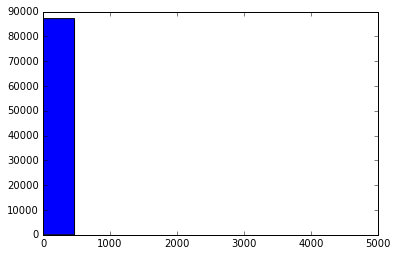

In [26]:
h = plt.hist(list(deg.values()))

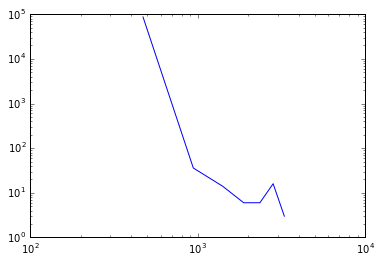

In [27]:
h = plt.loglog(h[1][1:], h[0])

In [28]:
def trim_degrees(g, degree=1):
    g2 = g.copy()
    d = nx.degree(g2)
    for n in g2.nodes():
        if d[n] <= degree:
            g2.remove_node(n)
    return g2

In [29]:
core = trim_degrees(g, degree=10)

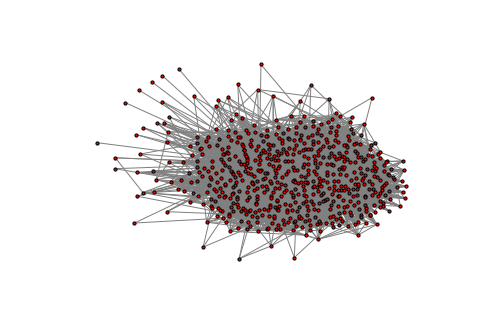

In [30]:
nx.draw(core, node_size=10, edge_color='gray')

## 近接中心性

* ある頂点から他の全頂点までの最短距離の平均で定義される中心性

In [31]:
c = nx.closeness_centrality(core)

In [32]:
cs = sorted(c.items(), key=lambda arg: (-arg[1], arg[0]))

In [33]:
cs[:10]

[('azbukivedi', 0.6155378486055777),
 ('valerois', 0.6137040714995035),
 ('bagira', 0.5896946564885496),
 ('karial', 0.5738161559888579),
 ('kpoxa_e', 0.5722222222222222),
 ('yelya', 0.5369244135534318),
 ('kirulya', 0.5364583333333334),
 ('angerona', 0.535064935064935),
 ('borisakunin', 0.53184165232358),
 ('snorapp', 0.5300171526586621)]

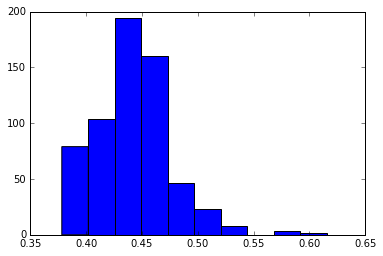

In [34]:
h = plt.hist(list(c.values()))

## 媒介中心性

* ある頂点がどれだけの最短経路を中継しているかで定義される中心性

In [35]:
b = nx.betweenness_centrality(core)

In [36]:
bs = sorted(b.items(), key=lambda arg: (-arg[1], arg[0]))

In [37]:
bs[:10]

[('valerois', 0.21148671833684948),
 ('azbukivedi', 0.09068546983753616),
 ('bagira', 0.06415743377135993),
 ('karial', 0.049436498735117004),
 ('kpoxa_e', 0.04044127058417223),
 ('snorapp', 0.02624442003749055),
 ('borisakunin', 0.023042685592280576),
 ('kirulya', 0.02260146049682856),
 ('eprst2000', 0.021420612080769168),
 ('doctor_liza', 0.02050725954366885)]

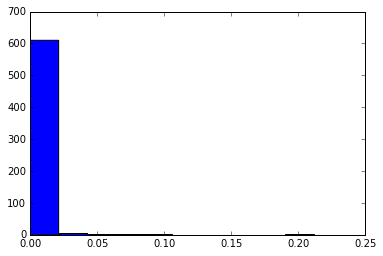

In [38]:
h = plt.hist(list(b.values()))

In [39]:
names1=[x[0] for x in ds[:10]]
names2=[x[0] for x in cs[:10]]
names3=[x[0] for x in bs[:10]]
names=list(set(names1) | set(names2) | set (names3))
[[name,deg[name],c[name],b[name]] for name in names]

[['azbukivedi', 2541, 0.6155378486055777, 0.09068546983753616],
 ['valerois', 232, 0.6137040714995035, 0.21148671833684948],
 ['yelya', 582, 0.5369244135534318, 0.01523932675275201],
 ['elladkin', 2616, 0.46466165413533833, 0.015728236400152987],
 ['angerona', 752, 0.535064935064935, 0.01923800645354709],
 ['samoleg', 2597, 0.4753846153846154, 0.015663680463377624],
 ['masha_koroleva', 2683, 0.4959871589085072, 0.012624543545596008],
 ['kirulya', 2398, 0.5364583333333334, 0.02260146049682856],
 ['doctor_liza', 3046, 0.48168355416991426, 0.02050725954366885],
 ['karial', 2717, 0.5738161559888579, 0.049436498735117004],
 ['kpoxa_e', 946, 0.5722222222222222, 0.04044127058417223],
 ['tareeva', 2970, 0.47575057736720555, 0.0058846904873034135],
 ['borisakunin', 4691, 0.53184165232358, 0.023042685592280576],
 ['snorapp', 2707, 0.5300171526586621, 0.02624442003749055],
 ['eprst2000', 2510, 0.5286569717707442, 0.021420612080769168],
 ['bagira', 1481, 0.5896946564885496, 0.06415743377135993],
 

## その他

* [固有ベクトル中心性](https://networkx.github.io/documentation/development/reference/algorithms.centrality.html)
* [Pagerank](https://networkx.github.io/documentation/development/reference/algorithms.link_analysis.html)

# 連結成分

* https://networkx.readthedocs.io/en/stable/reference/algorithms.component.html
* https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter1/egypt_retweets.net

In [40]:
e = nx.read_pajek('egypt_retweets.net')

In [41]:
len(list(nx.connected_component_subgraphs(e)))

3122

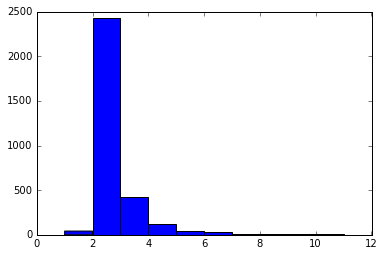

In [42]:
h = plt.hist([len(c) for c in nx.connected_component_subgraphs(e)], range=(1, 11))

In [43]:
[len(c) for c in nx.connected_component_subgraphs(e) if len(c) > 10]

[17762, 16, 64, 11, 11, 13, 14, 16]

In [44]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

def island_method(g, iterations=5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    step = (mx - mn) // iterations
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step)]

In [45]:
cc = list(nx.connected_component_subgraphs(e))[0]
islands = island_method(cc, 10)
for i in islands:
    print(i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1]))))

1 12360 314
31 83 27
61 27 11
91 12 5
121 8 3
151 5 2
181 5 2
211 5 2
241 5 2
271 5 2
301 3 1


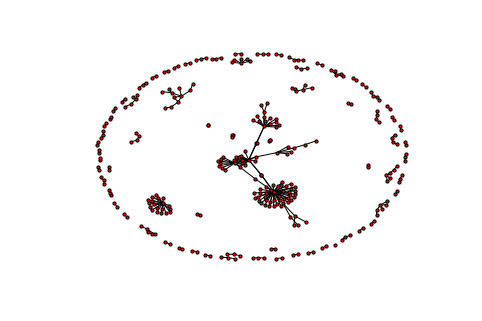

In [46]:
nx.draw(trim_edges(cc, weight=20), node_size=10)

# エゴグラフ

In [47]:
bieb = nx.Graph(nx.ego_graph(cc, 'justinbieber', radius=2))

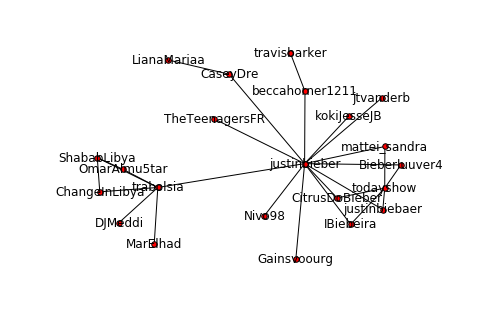

In [48]:
nx.draw(bieb, with_labels=True, node_size=30)

# クリーク (完全グラフ)

* https://networkx.readthedocs.io/en/stable/reference/algorithms.clique.html
* https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/economic.net

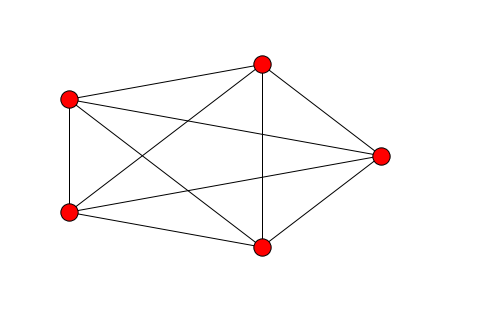

In [49]:
nx.draw_circular(nx.complete_graph(5))

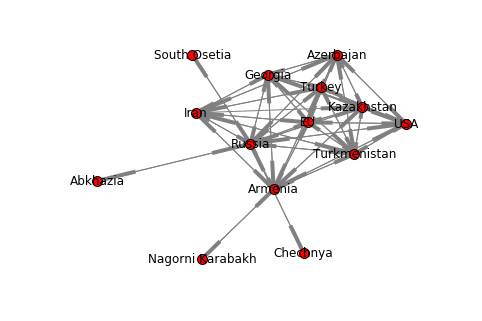

In [50]:
eco = nx.read_pajek('economic.net')
nx.draw(eco, with_labels=True, node_size=100, edge_color='gray')

In [51]:
list(nx.find_cliques(trim_edges(eco, 0.5)))

[['Abkhazia', 'Russia'],
 ['EU', 'Georgia'],
 ['EU', 'Armenia'],
 ['EU', 'Kazakhstan', 'USA'],
 ['EU', 'Kazakhstan', 'Russia'],
 ['EU', 'Azerbajan'],
 ['EU', 'Turkey', 'USA'],
 ['EU', 'Turkey', 'Russia'],
 ['Nagorni Karabakh', 'Armenia'],
 ['South Osetia', 'Russia'],
 ['Chechnya', 'Russia']]

## 2モードグラフ

* https://networkx.readthedocs.io/en/stable/reference/algorithms.bipartite.html
* https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter5/campaign_short.csv

In [52]:
import csv

g = nx.Graph()
pacs = []
candidates = []

for row in csv.reader(open('campaign_short.csv')):
    if row[0] not in pacs:
        pacs.append(row[0])
    if row[12] not in candidates:
        candidates.append(row[12])
    g.add_edge(row[0], row[12], weight=int(row[10]))

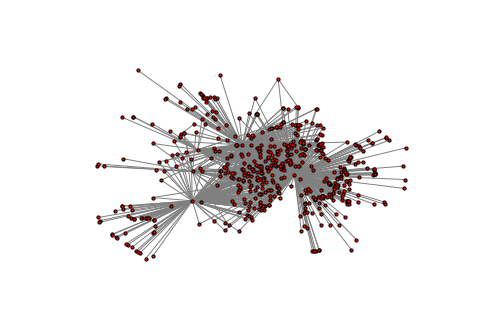

In [53]:
nx.draw(max(nx.connected_component_subgraphs(g), key=len), node_size=10, edge_color='gray')

In [54]:
pacnet = nx.bipartite.weighted_projected_graph(g, pacs, ratio=False)

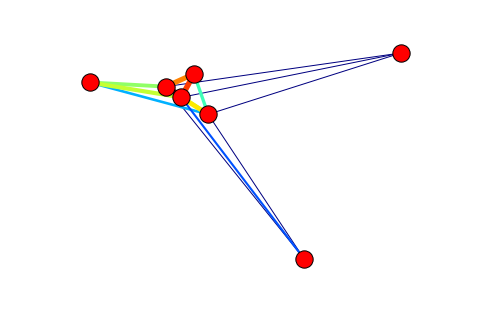

In [55]:
import math
mp = max(nx.connected_component_subgraphs(pacnet), key=len)
weights = [math.log(edata['weight']) + 1 for f, t, edata in mp.edges(data=True)]
nx.draw(mp, width=weights, edge_color=weights)

# まとめ

* NetworkXの使い方と、ネットワーク分析の概念をちょっとだけ紹介
* 自分の身の回りのデータで試してみると面白いかも？
* ※疑問点：NetworkXのグラフ描画にユーザは満足してる？
    * https://www.win.tue.nl/vis1/home/dholten/papers/forcebundles_eurovis.pdf